## CPMSC 448 Homework 2
### Problem 4

#### Name: Kush Lalwani
#### PSU id: kgl5163


In this problem will use the Pima Indians Diabetes dataset from the UCI repository to experiment with the $k$-NN algorithm and find the optimal value for the number of neighbors  $k$. You do not need to implement the algorithm and encouraged to use the implementation in \texttt{scikit-learn}.


### a) 
Download the provided `Pima.csv` data file and load it using `pandas`. As a sanity check, make sure  there are 768 rows of data (potential diabetes patients) and 9 columns (8 input features including  `Pregnancies`, `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`, `DiabetesPedigreeFunction`, `Age`, and 1 target output). Note that the data file has no header and you might want to explicitly create the header. The last value in each row contains the target label for that row, and the remaining values are the features. Report the statics of each feature (min, max, average) and the histogram of the labels (target outputs).
    

Dataset shape: (768, 9)

Column Names: Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Target'],
      dtype='object')

      Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
min      0.000000    0.000000       0.000000       0.000000    0.000000   
max     17.000000  199.000000     122.000000      99.000000  846.000000   
mean     3.845052  120.894531      69.105469      20.536458   79.799479   

            BMI  DiabetesPedigreeFunction        Age  
min    0.000000                  0.078000  21.000000  
max   67.100000                  2.420000  81.000000  
mean  31.992578                  0.471876  33.240885  


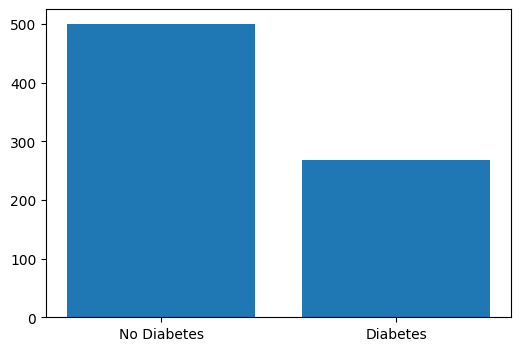

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

varNames = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Target"]

data = pd.read_csv("Pima.csv", names = varNames)

print(f"Dataset shape: {data.shape}\n\nColumn Names: {data.columns}\n")

print(data.drop(columns=["Target"]).agg(["min", "max", "mean"]))

plt.figure(figsize=(6, 4))
data["Target"].hist(bins=2, rwidth=0.8)
plt.xticks([0.25, 0.75], ["No Diabetes", "Diabetes"])
plt.grid(visible = False)
plt.show()

### b) 
Split the data into training and test data with 80\% training and 20\% test data sizes. 

Use 5-fold cross-validation on training data to decide the best number of neighbours $k$. To this end, you can use the built in functionality in  `scikit-learn` such as `cross_val_score`. For $k=1,2,3,\ldots, 15$ compute the 5-fold cross validation error and plot the results  (with values of $k$ on the $x$-axis and accuracy on the $y$-axis). Include the plot in your report and justify your decision for picking a particular number of neighbors $k$.

Best k: 13 with accuracy: 0.7345


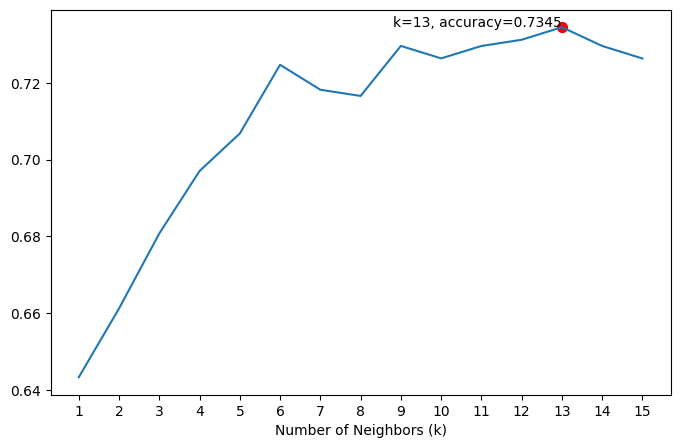

In [85]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
np.random.seed(448)

X = data.drop(columns=["Target"])
y = data["Target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

accuracies = []
klist = range(1,16)

for k in klist:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring="accuracy")
    accuracies.append(scores.mean())

best_accuracy = max(accuracies)
best_k = accuracies.index(best_accuracy) + 1

print(f"Best k: {best_k} with accuracy: {best_accuracy:.4f}")


plt.figure(figsize=(8, 5))
plt.plot(klist, cv_scores)
plt.xlabel("Number of Neighbors (k)")
plt.xticks(klist)
plt.scatter(best_k, best_accuracy, color="red", s=50)
plt.text(best_k, best_accuracy, f"k={best_k}, accuracy={best_accuracy:.4f}", horizontalalignment="right")

plt.show()


### c ) 
Evaluate the $k$-NN algorithm on test data with the optimal number of neighbours you obtained in previous step and report the test error.

In [94]:
from sklearn.metrics import accuracy_score

#train model with ideal k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

y_hat = knn_best.predict(X_test)

test_accuracy = accuracy_score(y_test, y_hat)

test_error = 1 - test_accuracy

print(f"Test Error: {test_error:.4f}")

Test Error: 0.2338


### d) 
Process the input data  by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation (a.k.a. standardization) over each dimension (feature),  repeat the previous part and report the accuracy. Do centralization and standardization affect the accuracy? Why?

In [100]:
X_mean = X_train.mean(axis=0) #find the means and standard deviations by the columns
X_std = X_train.std(axis=0)

X_train_scaled = (X_train - X_mean) / X_std
X_test_scaled = (X_test - X_mean) / X_std

knn_standard = KNeighborsClassifier(n_neighbors=best_k)
knn_standard.fit(X_train_scaled, y_train)

y_hat_scaled = knn_standard.predict(X_test_scaled)

test_accuracy_scaled = accuracy_score(y_test, y_hat_scaled)

test_error_scaled = 1 - test_accuracy_scaled

print(f"Test Error: {test_error_scaled:.4f}\n\nTest Accuracy: {test_accuracy_scaled:.4f}")

Test Error: 0.2532

Test Accuracy: 0.7468


As we can see, the test error and the accuracy slightly increased for the scaled knn regression model. This could be because standardizing the features in the dataset could potentially decrease the euclidean distance between points. Since, the scaling is different for each feature, some points may have gotten closer to others. This could lead to certain points being classified differently as they may now be closer to other points.